In [1]:
import torch
import torch.nn as nn
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

#Setting up the Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

MegaVector_2 = pd.read_csv("xyzVector.csv").to_numpy()
targets_2 = pd.read_csv("targets_2.csv").to_numpy()
#Retrieving the Data from CSV files
MegaVector = pd.read_csv("signals.csv").to_numpy()
targets = pd.read_csv("targets.csv").to_numpy()
n_features = MegaVector.shape[0]
#Converting the Data to a Torch Tensor for training and GPU parallel computing
MegaVector_t = torch.from_numpy(MegaVector.astype(np.float32)).to(device)
targets_t = torch.from_numpy(targets.astype(np.float32)).to(device)

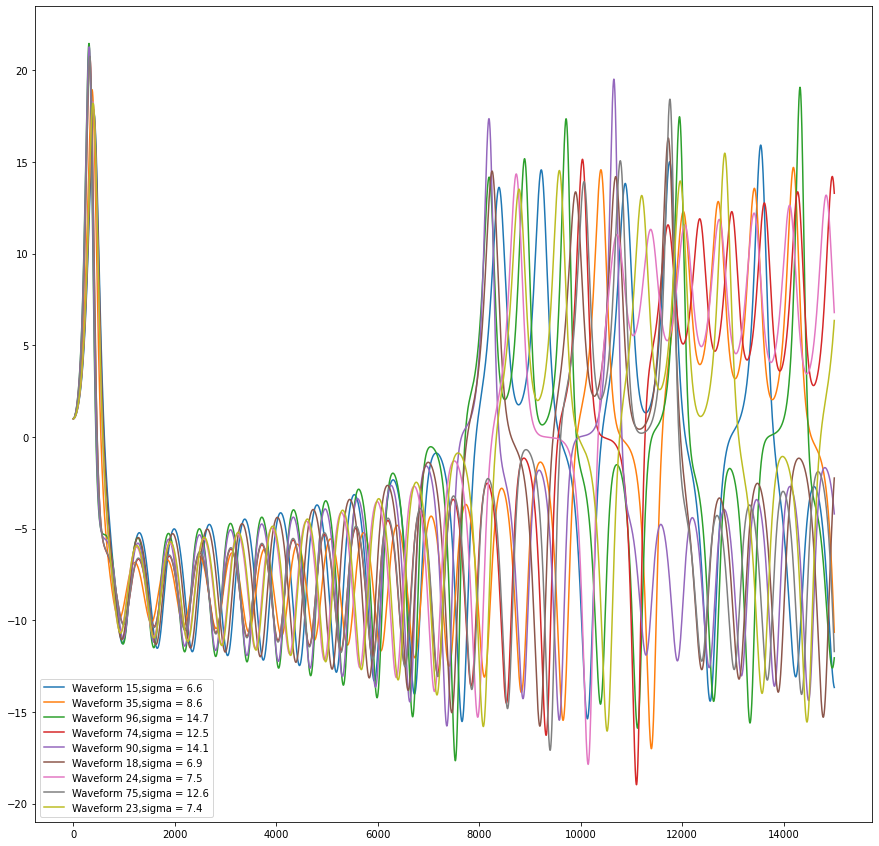

In [2]:
#Data Visualization
import matplotlib.pyplot as plt
idx_array = []
plt.figure(figsize = [15, 15])
cols, rows = 3,3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(targets_t), size = (1,)).item()
    waveform = MegaVector[:,sample_idx]
    #Matplotlib pyplot library works only with
    line = plt.plot(waveform, label=f"Waveform {str(sample_idx)},sigma = {targets[sample_idx].item()}")
    idx_array.append(sample_idx)

plt.legend()
plt.show()

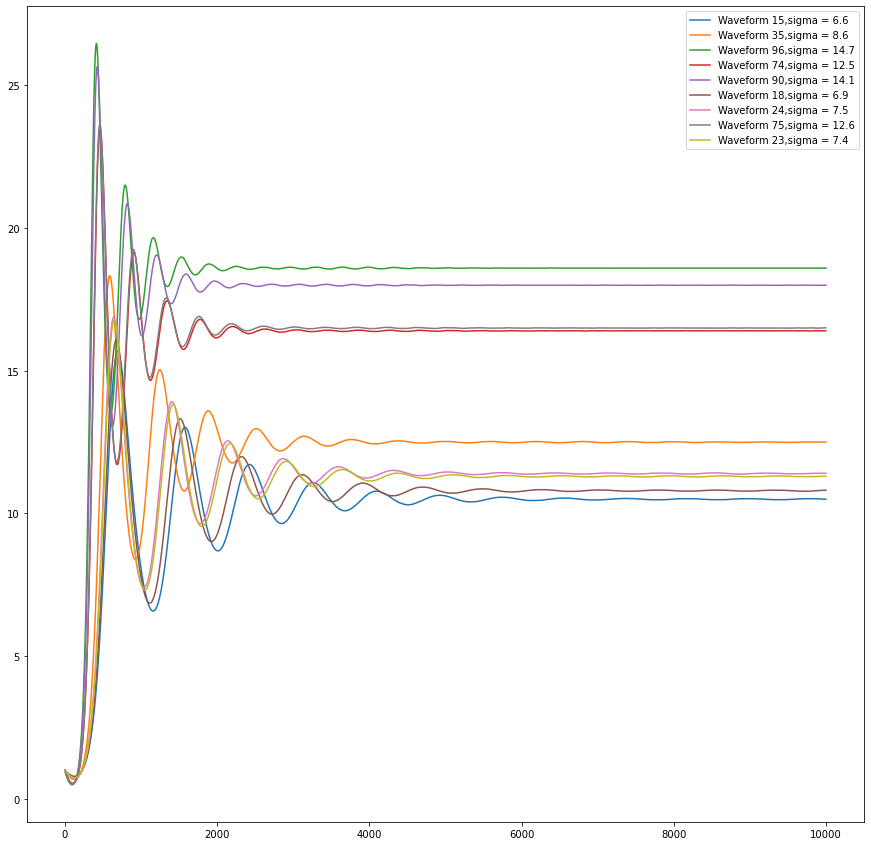

In [3]:
plt.figure(figsize = [15,15])
for sample in idx_array:
    waveform = MegaVector_2[:,sample*3+2]
    #Matplotlib pyplot library works only with
    line = plt.plot(waveform, label=f"Waveform {str(sample)},sigma = {targets_2[sample*3+2,0].item()}")
plt.legend()
plt.show()

In [4]:
print(idx_array[0])
print(targets_2[idx_array[0]*3+2,0])
print(targets[idx_array[0]])

15
6.6
[6.6]


In [5]:
#Network Layer design
class ParametersPredictor(nn.Module):
    def __init__(self, n_input_features):
        super(ParametersPredictor, self).__init__()
        self.linear = nn.Linear(n_input_features, 1000)
        self.linear2 = nn.Linear(1000, 1000)
        self.relu1 = nn.ReLU()
        self.linear3 = nn.Linear(1000, 1000)
        self.relu2 = nn.ReLU()
        self.linear4 = nn.Linear(1000, 1000)
        self.relu3 = nn.ReLU()
        self.linear5 = nn.Linear(1000, 1)


    def forward(self, x):
        out = self.linear(x)
        out = self.linear2(out)
        out = self.relu1(out)
        out = self.linear3(out)
        out = self.relu2(out)
        out = self.linear4(out)
        out = self.relu3(out)
        out = self.linear5(out)
        return out

In [7]:
#Training Loop
learning_rate = 0.0001
NeuralNetwork = ParametersPredictor(n_features).to(device)
batch_size = targets_t.shape[0]
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(NeuralNetwork.parameters(), lr=learning_rate)
total_loss = 0
EPOCHS = 1000
for epoch in tqdm(range(EPOCHS)):
    for i in range(batch_size):
        predicted_y = NeuralNetwork.forward(MegaVector_t[:,i].unsqueeze(dim=0))
        loss = criterion(targets_t[i].unsqueeze(dim = 0), predicted_y)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # updates
        optimizer.step()
        total_loss += loss/batch_size

        # zero gradients
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}. Loss: {total_loss:.8f}")
    if total_loss < 1:
        optimizer = torch.optim.Adam(NeuralNetwork.parameters(), lr=0.000001)
    elif total_loss < 0.1:
        optimizer = torch.optim.Adam(NeuralNetwork.parameters(), lr=0.000000001)
    elif total_loss < 0.001:
        optimizer = torch.optim.Adam(NeuralNetwork.parameters(), lr=1e-11)
    elif total_loss < 0.00001:
        optimizer = torch.optim.Adam(NeuralNetwork.parameters(), lr=1e-14)
    total_loss = 0

  0%|          | 1/1000 [00:01<20:35,  1.24s/it]

Epoch: 0. Loss: 4.97851181


  1%|          | 11/1000 [00:11<16:53,  1.03s/it]

Epoch: 10. Loss: 3.30988765


  2%|▏         | 21/1000 [00:21<16:43,  1.02s/it]

Epoch: 20. Loss: 2.29348636


  3%|▎         | 31/1000 [00:31<16:25,  1.02s/it]

Epoch: 30. Loss: 4.59346247


  4%|▍         | 41/1000 [00:42<16:15,  1.02s/it]

Epoch: 40. Loss: 1.91660368


  5%|▌         | 51/1000 [00:52<16:03,  1.02s/it]

Epoch: 50. Loss: 2.16449475


  6%|▌         | 61/1000 [01:02<15:53,  1.02s/it]

Epoch: 60. Loss: 1.03966665


  7%|▋         | 71/1000 [01:12<15:43,  1.02s/it]

Epoch: 70. Loss: 0.73715866


  8%|▊         | 81/1000 [01:22<15:33,  1.02s/it]

Epoch: 80. Loss: 0.51834935


  9%|▉         | 91/1000 [01:32<15:23,  1.02s/it]

Epoch: 90. Loss: 0.39378569


 10%|█         | 101/1000 [01:43<15:13,  1.02s/it]

Epoch: 100. Loss: 0.31949764


 11%|█         | 111/1000 [01:53<15:02,  1.02s/it]

Epoch: 110. Loss: 0.26652044


 12%|█▏        | 121/1000 [02:03<14:54,  1.02s/it]

Epoch: 120. Loss: 0.22608258


 13%|█▎        | 131/1000 [02:13<14:43,  1.02s/it]

Epoch: 130. Loss: 0.19141997


 14%|█▍        | 141/1000 [02:23<14:32,  1.02s/it]

Epoch: 140. Loss: 0.16028297


 15%|█▌        | 151/1000 [02:33<14:22,  1.02s/it]

Epoch: 150. Loss: 0.13402364


 16%|█▌        | 161/1000 [02:44<14:13,  1.02s/it]

Epoch: 160. Loss: 0.11067364


 17%|█▋        | 171/1000 [02:54<14:01,  1.02s/it]

Epoch: 170. Loss: 0.09057806


 18%|█▊        | 181/1000 [03:04<13:59,  1.03s/it]

Epoch: 180. Loss: 0.07492568


 19%|█▉        | 191/1000 [03:14<13:54,  1.03s/it]

Epoch: 190. Loss: 0.06068637


 20%|██        | 201/1000 [03:24<13:32,  1.02s/it]

Epoch: 200. Loss: 0.04814104


 21%|██        | 211/1000 [03:35<13:22,  1.02s/it]

Epoch: 210. Loss: 0.03853420


 22%|██▏       | 221/1000 [03:45<13:10,  1.02s/it]

Epoch: 220. Loss: 0.02990581


 23%|██▎       | 231/1000 [03:55<13:13,  1.03s/it]

Epoch: 230. Loss: 0.02297578


 24%|██▍       | 241/1000 [04:05<12:54,  1.02s/it]

Epoch: 240. Loss: 0.01800028


 25%|██▌       | 251/1000 [04:15<12:43,  1.02s/it]

Epoch: 250. Loss: 0.01464720


 26%|██▌       | 261/1000 [04:26<12:33,  1.02s/it]

Epoch: 260. Loss: 0.01126824


 27%|██▋       | 271/1000 [04:36<12:24,  1.02s/it]

Epoch: 270. Loss: 0.00929475


 28%|██▊       | 281/1000 [04:46<12:12,  1.02s/it]

Epoch: 280. Loss: 0.00727718


 29%|██▉       | 291/1000 [04:56<12:04,  1.02s/it]

Epoch: 290. Loss: 0.00597545


 30%|███       | 301/1000 [05:06<11:51,  1.02s/it]

Epoch: 300. Loss: 0.00502576


 31%|███       | 311/1000 [05:17<11:44,  1.02s/it]

Epoch: 310. Loss: 0.00417585


 32%|███▏      | 321/1000 [05:27<11:32,  1.02s/it]

Epoch: 320. Loss: 0.00374744


 33%|███▎      | 331/1000 [05:37<11:21,  1.02s/it]

Epoch: 330. Loss: 0.00284802


 34%|███▍      | 341/1000 [05:47<11:12,  1.02s/it]

Epoch: 340. Loss: 0.00240998


 35%|███▌      | 351/1000 [05:57<11:01,  1.02s/it]

Epoch: 350. Loss: 0.00217887


 36%|███▌      | 361/1000 [06:07<10:50,  1.02s/it]

Epoch: 360. Loss: 0.00180399


 37%|███▋      | 371/1000 [06:18<10:40,  1.02s/it]

Epoch: 370. Loss: 0.00146372


 38%|███▊      | 381/1000 [06:28<10:30,  1.02s/it]

Epoch: 380. Loss: 0.00224245


 39%|███▉      | 391/1000 [06:38<10:20,  1.02s/it]

Epoch: 390. Loss: 0.00115077


 40%|████      | 401/1000 [06:48<10:10,  1.02s/it]

Epoch: 400. Loss: 0.00151962


 41%|████      | 411/1000 [06:58<09:59,  1.02s/it]

Epoch: 410. Loss: 0.00108345


 42%|████▏     | 421/1000 [07:09<09:55,  1.03s/it]

Epoch: 420. Loss: 0.00190874


 43%|████▎     | 426/1000 [07:14<09:45,  1.02s/it]


KeyboardInterrupt: 

In [8]:
print(NeuralNetwork(MegaVector_t[:,0]).item())
print(targets_t[0].item())

5.060905933380127
5.099999904632568


In [9]:
print(NeuralNetwork(MegaVector_t[:,50]).item())
print(targets_t[50].item())

10.066690444946289
10.100000381469727


In [10]:
print(NeuralNetwork(MegaVector_t[:,17]).item())
print(targets_t[17].item())

6.775413513183594
6.800000190734863


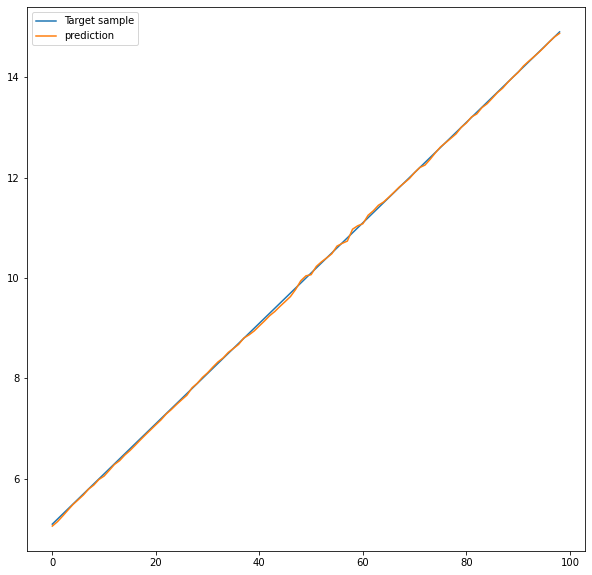

In [11]:
import matplotlib.pyplot as plt
predictions = []
for i in range(batch_size):
    predictions.append(NeuralNetwork(MegaVector_t[:,i]).item())

predictions = np.array(predictions)
plt.figure(figsize = [10,10])
plt.plot(targets, label="Target sample")
plt.plot(predictions, label="prediction")
plt.legend()
plt.show()

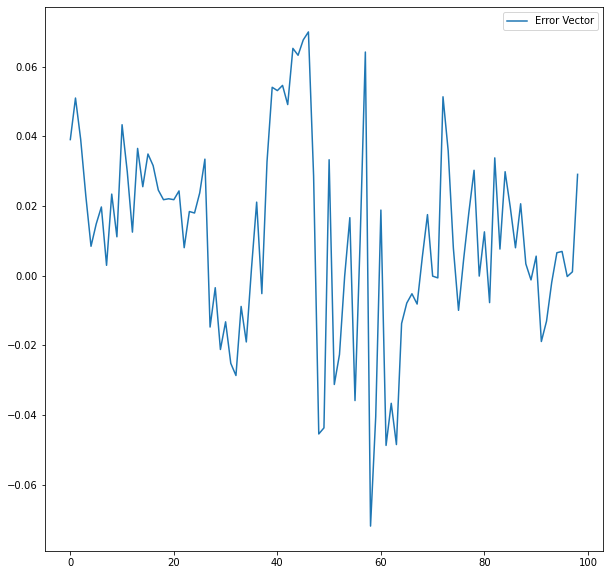

Error mean: 0.010834843221336904


In [12]:
predictions = predictions.reshape(99,1)
error_vector = targets - predictions
plt.figure(figsize = [10,10])
plt.plot(error_vector, label = "Error Vector")
plt.legend()
plt.show()
print(f"Error mean: {error_vector.mean()}")

In [14]:
#Saving the Neural Network with the trained weights and biases
SAVE_PATH = r"C:\Users\Tatonta\Desktop\Deep Learning\ParametersPrediction.pth"
torch.save(NeuralNetwork, SAVE_PATH)

In [87]:
# The following code is needed to load the Neural Network on another computer
# The Neural Network class must be preemptively declared before loading it from the .pth file
## NeuralNetwork = torch.load(NN_PATH, map_location = device)
# NN_PATH is where the .pth file with the trained network is located in your computer directories
# map_location = device is necessary in order to have the Network work properly on CPU-only computer hardware
# NeuralNetwork.eval()
#The Neural Network is finally ready for inference

ParametersPredictor(
  (linear): Linear(in_features=14999, out_features=1000, bias=True)
  (linear2): Linear(in_features=1000, out_features=1000, bias=True)
  (relu1): ReLU()
  (linear3): Linear(in_features=1000, out_features=1000, bias=True)
  (relu2): ReLU()
  (linear4): Linear(in_features=1000, out_features=1000, bias=True)
  (relu3): ReLU()
  (linear5): Linear(in_features=1000, out_features=1, bias=True)
)